In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('tripadvisor.xls')

In [3]:
df

,name,address,Phone,price_range_from,price_range_to,cuisines,rating,review_count,excellent_count,very_good_count,average_count,poor_count,terrible_count
0,1 Tablespoon,"23, Ram Villa, Opposite Sahkari Bhandar, Matun...",+91 22 2403 3441,NaN,NaN,"Pizza, Fast food",4.0,31,9,15,4,2,1
1,10th Street Cafe,"Khar Pali Road, Road No 10, Khar Shop No 3 & 4...",+91 87790 92308,NaN,NaN,"Italian, Cafe",4.5,18,8,8,2,0,0
2,10th Street Cafe,"10th Road , Shop No 8 , Sukhmani Himalaya Coop...",+91 22 2628 2826,NaN,NaN,"Italian, Mexican, American, Cafe, Eastern Euro...",4.0,7,3,3,0,0,1
3,1441 Pizzeria,"Raj Infinia, Evershine Nagar Malad West Near M...",+91 80970 81441,245.0,645.0,"Italian, Pizza, Fast food",4.5,68,51,16,1,0,0
4,1441 Pizzeria,"Senapati Bapat Road, Mumbai 400053 India",+91 84549 14411,245.0,745.0,"Pizza, Italian",4.5,40,23,16,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,Zoobar,"Vile Parle West Liberty Lodge, 1st Floor, DJ M...",+91 73039 66227,NaN,NaN,"Bar, Pub",4.0,27,8,15,3,1,0
2991,Zoodles,"3rd Floor, Oberoi Mall, Off Western Express Hi...",+91 80808 04040,NaN,NaN,"Chinese, Asian, Fast food",4.0,16,4,7,3,1,1
2992,zoodles,4 - 5 Meghraj Cooperative Housing Society Grou...,+91 22 2630 0000,NaN,NaN,"Chinese, Asian",4.0,28,10,9,8,0,1
2993,Zouk Lounge & Kitchen,"45 Telly Park Road Hotel Imperial Palac, Mumba...",+91 93206 20947,NaN,NaN,"Indian, Bar, Pub",3.5,20,3,7,8,2,0


In [4]:
df.isna().sum()

name                   0
address                0
Phone                134
price_range_from    2609
price_range_to      2609
cuisines             548
rating                 0
review_count           0
excellent_count        0
very_good_count        0
average_count          0
poor_count             0
terrible_count         0
dtype: int64

In [5]:
duplicate=df[df.duplicated(subset=['name','address','Phone'],keep=False)]
print(duplicate)

Empty DataFrame
Columns: [name, address, Phone, price_range_from, price_range_to, cuisines, rating, review_count, excellent_count, very_good_count, average_count, poor_count, terrible_count]
Index: []


In [6]:
df.drop(['Phone','price_range_from','price_range_to'],axis=1,inplace=True)

In [7]:
df.cuisines.unique()

array(['Pizza, Fast food', 'Italian, Cafe',
       'Italian, Mexican, American, Cafe, Eastern European',
       'Italian, Pizza, Fast food', 'Pizza, Italian', 'Italian, Pizza',
       nan, 'Indian, Cafe',
       'Mexican, Chinese, Asian, Healthy, Azerbaijani, Indian',
       'Chinese, Indian, Pizza, Street Food, Asian', 'Asian', 'Indian',
       'European, Italian, American', 'Cafe', 'Indian, Asian',
       'Bar, European, Pub, Fusion, Wine Bar', 'Bar, Indian, Pub',
       'Thai, Asian, Indian', 'Chinese, Thai', 'Chinese, Asian, Thai',
       'Chinese, Asian, Indian, Thai', 'Chinese, Asian',
       'Chinese, Asian, Indian', 'Bar, Pub, European, Spanish', 'Italian',
       'Italian, Indian, Spanish, Greek, Central-Italian',
       'Italian, Mexican, Indian, Asian, Greek', 'Indian, Bar, Pub',
       'Italian, Mexican, Chinese, Indian, Asian',
       'Chinese, Seafood, Asian', 'International', 'Indian, Fast food',
       'Fast food, Barbecue', 'Vegetarian Friendly',
       'Italian, Mexic

In [8]:
df.dropna(how='any',inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447 entries, 0 to 2994
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2447 non-null   object 
 1   address          2447 non-null   object 
 2   cuisines         2447 non-null   object 
 3   rating           2447 non-null   float64
 4   review_count     2447 non-null   int64  
 5   excellent_count  2447 non-null   object 
 6   very_good_count  2447 non-null   object 
 7   average_count    2447 non-null   int64  
 8   poor_count       2447 non-null   int64  
 9   terrible_count   2447 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 210.3+ KB


In [10]:
#excellent_count and #vgood_count has datatype object but values in numeric we have to change the datatype

In [11]:
df['excellent_count']=df['excellent_count'].str.replace(',','').astype(int)

In [12]:
df['very_good_count']=df['very_good_count'].str.replace(',','').astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447 entries, 0 to 2994
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2447 non-null   object 
 1   address          2447 non-null   object 
 2   cuisines         2447 non-null   object 
 3   rating           2447 non-null   float64
 4   review_count     2447 non-null   int64  
 5   excellent_count  2447 non-null   int64  
 6   very_good_count  2447 non-null   int64  
 7   average_count    2447 non-null   int64  
 8   poor_count       2447 non-null   int64  
 9   terrible_count   2447 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 210.3+ KB


In [14]:
from textwrap import wrap

In [15]:
data=df[:10][['name','rating','review_count','excellent_count','very_good_count','average_count','poor_count','terrible_count']]
data

,name,rating,review_count,excellent_count,very_good_count,average_count,poor_count,terrible_count
0,1 Tablespoon,4.0,31,9,15,4,2,1
1,10th Street Cafe,4.5,18,8,8,2,0,0
2,10th Street Cafe,4.0,7,3,3,0,0,1
3,1441 Pizzeria,4.5,68,51,16,1,0,0
4,1441 Pizzeria,4.5,40,23,16,1,0,0
5,1441 Pizzeria,4.5,143,68,58,9,2,4
6,1441 Pizzeria Lokhandwala,4.5,71,47,22,1,0,0
7,1441 Pizzeria Thane,4.0,18,9,6,1,1,1
9,145 Cafe & Bar,4.5,18,13,4,0,1,0
10,145 Kala Ghoda,4.5,48,27,19,2,0,0


In [16]:
names=data.iloc[:,0]
barrating=data.iloc[:,1]
barreview=data.iloc[:,2]
barexcellent=data.iloc[:,3]
barvgood=data.iloc[:,4]
baravg=data.iloc[:,5]
barpoor=data.iloc[:,6]
barteri=data.iloc[:,7]
index=np.arange(len(data))

Text(0.5, 1.0, 'Review of Mumbai Restaurants')

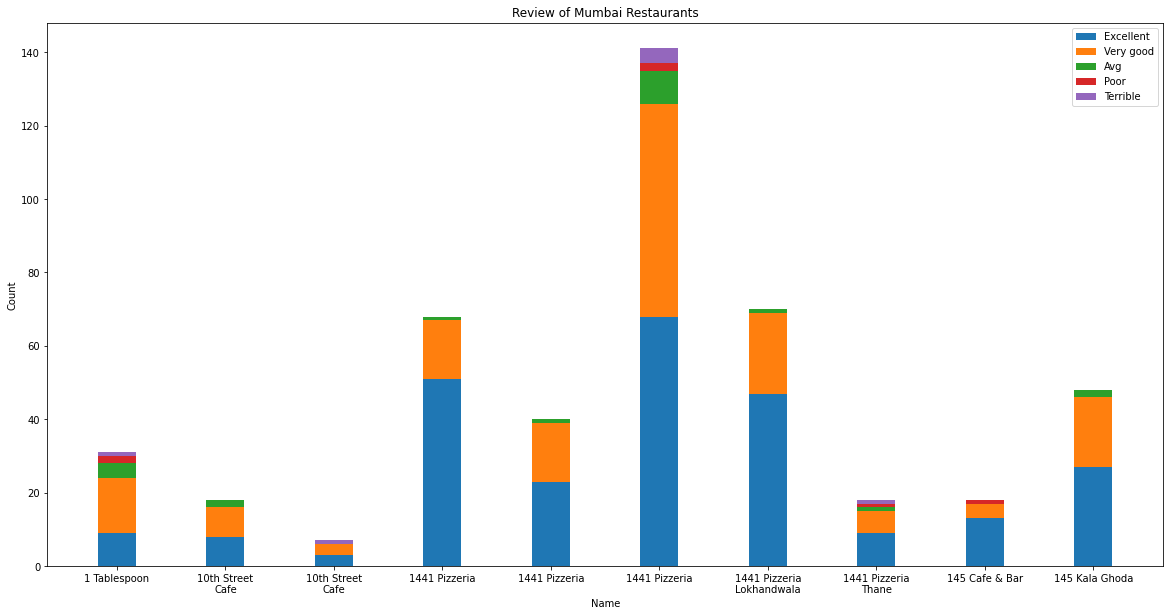

In [17]:
plt.figure(figsize=(20,10))
graphexcellent=plt.bar(x=index,height=barexcellent,width=0.35)
graphvgood=plt.bar(x=index,height=barvgood,width=0.35,bottom=barexcellent)
graphavg=plt.bar(x=index,height=baravg,width=0.35,bottom=barexcellent+barvgood)
graphpoor=plt.bar(x=index,height=barpoor,width=0.35,bottom=barexcellent+barvgood+baravg)
graphteri=plt.bar(x=index,height=barteri,width=0.35,bottom=barexcellent+barvgood+baravg+barpoor)
plt.legend(['Excellent','Very good','Avg','Poor','Terrible'])
plt.xlabel('Name')
plt.ylabel('Count')
names=["\n".join(wrap(name,15))for name in names]
plt.xticks(index,names)
plt.title('Review of Mumbai Restaurants')

In [18]:
df.cuisines.unique()

array(['Pizza, Fast food', 'Italian, Cafe',
       'Italian, Mexican, American, Cafe, Eastern European',
       'Italian, Pizza, Fast food', 'Pizza, Italian', 'Italian, Pizza',
       'Indian, Cafe',
       'Mexican, Chinese, Asian, Healthy, Azerbaijani, Indian',
       'Chinese, Indian, Pizza, Street Food, Asian', 'Asian', 'Indian',
       'European, Italian, American', 'Cafe', 'Indian, Asian',
       'Bar, European, Pub, Fusion, Wine Bar', 'Bar, Indian, Pub',
       'Thai, Asian, Indian', 'Chinese, Thai', 'Chinese, Asian, Thai',
       'Chinese, Asian, Indian, Thai', 'Chinese, Asian',
       'Chinese, Asian, Indian', 'Bar, Pub, European, Spanish', 'Italian',
       'Italian, Indian, Spanish, Greek, Central-Italian',
       'Italian, Mexican, Indian, Asian, Greek', 'Indian, Bar, Pub',
       'Italian, Mexican, Chinese, Indian, Asian',
       'Chinese, Seafood, Asian', 'International', 'Indian, Fast food',
       'Fast food, Barbecue', 'Vegetarian Friendly',
       'Italian, Mexican, I

In [19]:
dummies = df['cuisines'].str.get_dummies(sep=', ')
df_cuisines = pd.concat([df, dummies], axis=1)
df_cuisines = df_cuisines.drop(['Bar', 'Barbecue', 'Brew Pub', 'Cafe', 'Contemporary', 'Deli', 'Diner', 'Dining bars', 'Fast food', 'Fusion', 'Gastropub', 'Gluten Free Options', 'Grill', 'Healthy', 'Pub', 'Seafood', 'Soups', 'Sports bars', 'Steakhouse', 'Street Food', 'Vegan Options', 'Vegetarian Friendly', 'Wine Bar', 'International'], axis=1)

merge_cuisines = df_cuisines['American'] + df_cuisines['Central American'] + df_cuisines['Cajun & Creole'] + df_cuisines['Southwestern']
df_cuisines['American1'] = merge_cuisines
df_cuisines['American1'] = df_cuisines.American1.replace((4, 3, 2), 1)

merge_cuisines = df_cuisines['Central-Italian'] + df_cuisines['Italian'] + df_cuisines['Northern-Italian'] + df_cuisines['Pizza'] + df_cuisines['Southern-Italian']
df_cuisines['Italian1'] = merge_cuisines
df_cuisines['Italian1'] = df_cuisines.Italian1.replace((3,2), 1)

merge_cuisines = df_cuisines['Japanese'] + df_cuisines['Sushi']
df_cuisines['Japanese1'] = merge_cuisines
df_cuisines['Japanese1'] = df_cuisines.Japanese1.replace(2, 1)

merge_cuisines = df_cuisines['Central European'] + df_cuisines['European']
df_cuisines['European1'] = merge_cuisines
df_cuisines['European1'] = df_cuisines.European1.replace(2, 1)


df_cuisines = df_cuisines.drop(['American', 'Central American', 'Cajun & Creole', 'Southwestern', 'Central-Italian', 'Italian', 'Northern-Italian', 'Pizza', 'Southern-Italian', 'Japanese', 'Sushi', 'Asian', 'Central Asian', 'Central European', 'European'], axis=1)
df_cuisines = df_cuisines.rename(columns = {'American1': 'American', 'Italian1': 'Italian', 'Japanese1': 'Japanese', 'European1': 'European'})

In [20]:
rest = df[['rating','name', 'review_count']]
rest_top = pd.concat([rest], ignore_index = True).dropna()
rest_top = rest_top.sort_values(by=['rating', 'review_count'], ascending = False)
rest_5 = rest_top.groupby(['rating']).get_group(5.0)
rest_4half = rest_top.groupby(['rating']).get_group(4.5)
rest_4 = rest_top.groupby(['rating']).get_group(4.0)
rest_3half = rest_top.groupby(['rating']).get_group(3.5)

In [21]:
import plotly.express as px

In [22]:
fig = px.bar(rest_5[0:10],
             x='name',
             y='review_count',
             labels={"review_count": "Highest rating based on review count",
                     "name": "Restaurant Name"},
             title = 'Top 10 5 star Restaurants in Mumbai.')
fig.show()

In [23]:
rest_top_review = rest_top.sort_values(by=['review_count'], ascending = False)
fig = px.bar(rest_top_review[0:10],
             x='name',
             y='review_count',
             labels={"review_count": "Review Count",
                     "name": "Restaurant Name"},
             title = 'Top 10 highest reviewed Restaurants in Mumbai')
fig.show()

In [24]:
df_cuisine_count = df_cuisines.drop(['name','address','cuisines','rating','review_count','excellent_count','very_good_count','average_count','poor_count','terrible_count'], axis=1)
df_cuisine_count = df_cuisine_count.sum().sort_values(ascending = False)
df_cuisine_count = df_cuisine_count.reset_index()
df_cuisine_count.columns = ['Cuisine', 'Count']

In [25]:
fig = px.bar(df_cuisine_count[0:10],
             x='Cuisine',
             y='Count',
             title = 'Top 10 cuisine in Mumbai')
fig.show()

In [26]:
rest_cuis = df_cuisines[['rating','name', 'review_count', 'Indian', 'Chinese', 'Italian', 'European', 'Thai', 'American', 'Mexican', 'Mediterranean', 'Middle Eastern', 'Japanese',]]
rest_cuis = pd.concat([rest_cuis], ignore_index = True)
rest_cuis = rest_cuis.sort_values(by=['review_count', 'rating'], ascending = False)
indian = rest_cuis.groupby(['Indian']).get_group(1.0)
chinese = rest_cuis.groupby(['Chinese']).get_group(1.0)
italian = rest_cuis.groupby(['Italian']).get_group(1.0)
european = rest_cuis.groupby(['European']).get_group(1.0)
thai = rest_cuis.groupby(['Thai']).get_group(1.0)
american = rest_cuis.groupby(['American']).get_group(1.0)
mexican = rest_cuis.groupby(['Mexican']).get_group(1.0)
mediterranean = rest_cuis.groupby(['Mediterranean']).get_group(1.0)
middle_eastern = rest_cuis.groupby(['Middle Eastern']).get_group(1.0)
japanese = rest_cuis.groupby(['Japanese']).get_group(1.0)

In [27]:
fig = px.bar(italian[0:10],
             x='name',
             y='review_count',
             labels={"review_count": "Highest rating based on review count",
                     "name": "Restaurant Name"},
             title = 'Top 10 Italian Restaurants in Mumbai')
fig.show()